In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from urllib.request import urlopen
from bs4 import BeautifulSoup

In [2]:
url = "http://www.hubertiming.com/results/2017GPTR10K"
html = urlopen(url)
html

### Web Data Gathering using Beautiful Soup

In [3]:
soup = BeautifulSoup(html, 'lxml')
type(soup)

bs4.BeautifulSoup

In [4]:
title = soup.title
print(title)

<title>Race results for the 2017 Intel Great Place to Run \ Urban Clash Games!</title>


In [5]:
# Print out the text
text = soup.get_text()
text

"\n\n\n\n\n\n\nRace results for the 2017 Intel Great Place to Run \\ Urban Clash Games!\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n 2017 Intel Great Place to Run 10K \\ Urban Clash Games\n Hillsboro Stadium, Hillsboro, OR \n June 2nd, 2017\r\n\r\n\r\n                            \n\n\n\n\n\n Email\r\n                        timing@hubertiming.com with results questions. Please include your bib number if you have it.\r\n\r\n\r\n                    \n\n\n\n\n\n\nHuber Timing Home\n\n\n\n\n\n10K:\n\n\nFinishers:\n577\n\n\nMale:\n414\n\n\nFemale:\n163\n\n\n\n\n\n\n\n\n\n 5K Individual\n 5K Team\n 10K Individual\n 10K Team\n Summary\n\n\n\n\nIndvidual Results\n\n\n\n10K Results\n\n\n\nSearch:\n\nSearch\nDivision:\n\nMen\nWomen\nMasters Men\nMasters Women\n\nF 18-25\nF 26-35\nF 36-45\nF 46-55\nF Under 18\nM 18-25\nM 26-35\nM 36-45\nM 46-55\nM 55+\nM Under 18\n Team:\n\nUnattached\nCOLUMBIA TEAM A\nCOLUMBIA TEAM B\nCOLUMBIA TEAM C\nCOLUMBIA TEAM D\nCOLUMBIA TEAM E\nDTNA1\nDTNA2\nDTNA3\nFXG1\nI

In [6]:
soup.find_all('a')

[<a href="mailto:timing@hubertiming.com">timing@hubertiming.com</a>,
 <a href="https://www.hubertiming.com/">Huber Timing Home</a>,
 <a class="btn btn-primary btn-lg" href="/results/2017GPTR" role="button" style="margin: 0px 0px 5px 5px"><i aria-hidden="true" class="fa fa-user"></i> 5K Individual</a>,
 <a class="btn btn-primary btn-lg" href="/results/team/2017GPTR" role="button" style="margin: 0px 0px 5px 5px"><i aria-hidden="true" class="fa fa-users"></i> 5K Team</a>,
 <a class="btn btn-primary btn-lg" href="/results/team/2017GPTR10K" role="button" style="margin: 0px 0px 5px 5px"><i aria-hidden="true" class="fa fa-users"></i> 10K Team</a>,
 <a class="btn btn-primary btn-lg" href="/results/summary/2017GPTR10K" role="button" style="margin: 0px 0px 5px 5px"><i class="fa fa-stream"></i> Summary</a>,
 <a id="individual" name="individual"></a>,
 <a data-url="/results/2017GPTR10K" href="#tabs-1" id="rootTab" style="font-size: 18px">10K Results</a>,
 <a href="https://www.hubertiming.com/"><im

In [7]:
all_links = soup.find_all("a")
for link in all_links:
    print(link.get("href"))

mailto:timing@hubertiming.com
https://www.hubertiming.com/
/results/2017GPTR
/results/team/2017GPTR
/results/team/2017GPTR10K
/results/summary/2017GPTR10K
None
#tabs-1
https://www.hubertiming.com/
https://facebook.com/hubertiming/
None


In [8]:
# Print the first 10 rows for sanity check
rows = soup.find_all('tr')
print(rows[:10])

[<tr colspan="2">
<b>10K:</b>
</tr>, <tr>
<td>Finishers:</td>
<td>577</td>
</tr>, <tr>
<td>Male:</td>
<td>414</td>
</tr>, <tr>
<td>Female:</td>
<td>163</td>
</tr>, <tr class="header">
<th>Place</th>
<th>Bib</th>
<th>Name</th>
<th>Gender</th>
<th>City</th>
<th>State</th>
<th>Chip Time</th>
<th>Chip Pace</th>
<th>Gun Time</th>
<th>Team</th>
</tr>, <tr data-bib="814">
<td>1</td>
<td>814</td>
<td>

                    JARED WILSON

                </td>
<td>M</td>
<td>TIGARD</td>
<td>OR</td>
<td>36:21</td>
<td>5:51</td>
<td>36:24</td>
<td></td>
</tr>, <tr data-bib="573">
<td>2</td>
<td>573</td>
<td>

                    NATHAN A SUSTERSIC

                </td>
<td>M</td>
<td>PORTLAND</td>
<td>OR</td>
<td>36:42</td>
<td>5:55</td>
<td>36:45</td>
<td>
<img class="lazy teamThumbs" data-src="/teamLogoThumbnail/logo?teamName=INTEL%20TEAM%20F&amp;raceId=1251&amp;state=OR"/>
                            INTEL TEAM F
                        </td>
</tr>, <tr data-bib="687">
<td>3</td>
<td>687</td>
<

In [9]:
table = []
for row in rows:
    row_td = row.find_all('td')
    table.append(row_td)
print(row_td)
type(row_td)

[<td>577</td>, <td>443</td>, <td>

                    LIBBY B MITCHELL

                </td>, <td>F</td>, <td>HILLSBORO</td>, <td>OR</td>, <td>1:41:18</td>, <td>16:20</td>, <td>1:42:10</td>, <td></td>]


bs4.element.ResultSet

In [12]:
str_cells = str(row_td)
cleantext = BeautifulSoup(str_cells, "lxml").get_text()
print(cleantext)

[577, 443, 

                    LIBBY B MITCHELL

                , F, HILLSBORO, OR, 1:41:18, 16:20, 1:42:10, ]


In [14]:
import re

list_rows = []
for row in rows:
    cells = row.find_all('td')
    str_cells = str(cells)
    clean = re.compile('<.*?>')
    clean2 = (re.sub(clean, '',str_cells))
    list_rows.append(clean2)
print(clean2)
type(clean2)

[577, 443, 

                    LIBBY B MITCHELL

                , F, HILLSBORO, OR, 1:41:18, 16:20, 1:42:10, ]


str

In [15]:
df = pd.DataFrame(list_rows)
df.head(10)

,0
0,[]
1,"[Finishers:, 577]"
2,"[Male:, 414]"
3,"[Female:, 163]"
4,[]
5,"[1, 814, \r\n\r\n JARED WIL..."
6,"[2, 573, \r\n\r\n NATHAN A ..."
7,"[3, 687, \r\n\r\n FRANCISCO..."
8,"[4, 623, \r\n\r\n PAUL MORR..."
9,"[5, 569, \r\n\r\n DEREK G O..."


### Data Transformation

In [16]:
df1 = df[0].str.split(',', expand=True)
df1.head(10)

,0,1,2,3,4,5,6,7,8,9
0,[],None,None,None,None,None,None,None,None,None
1,[Finishers:,577],None,None,None,None,None,None,None,None
2,[Male:,414],None,None,None,None,None,None,None,None
3,[Female:,163],None,None,None,None,None,None,None,None
4,[],None,None,None,None,None,None,None,None,None
5,[1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,OR,36:21,5:51,36:24,]
6,[2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,OR,36:42,5:55,36:45,\n\r\n INTEL TEAM ...
7,[3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,OR,37:44,6:05,37:48,]
8,[4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,OR,38:34,6:13,38:37,]
9,[5,569,\r\n\r\n DEREK G OSBORNE\r...,M,HILLSBORO,OR,39:21,6:20,39:24,\n\r\n INTEL TEAM ...


In [17]:
df1[0] = df1[0].str.strip('[')
df1.head(10)

,0,1,2,3,4,5,6,7,8,9
0,],None,None,None,None,None,None,None,None,None
1,Finishers:,577],None,None,None,None,None,None,None,None
2,Male:,414],None,None,None,None,None,None,None,None
3,Female:,163],None,None,None,None,None,None,None,None
4,],None,None,None,None,None,None,None,None,None
5,1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,OR,36:21,5:51,36:24,]
6,2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,OR,36:42,5:55,36:45,\n\r\n INTEL TEAM ...
7,3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,OR,37:44,6:05,37:48,]
8,4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,OR,38:34,6:13,38:37,]
9,5,569,\r\n\r\n DEREK G OSBORNE\r...,M,HILLSBORO,OR,39:21,6:20,39:24,\n\r\n INTEL TEAM ...


In [20]:
col_labels = soup.find_all('th')
str_headers = str(col_labels)
headers = [BeautifulSoup(str_headers, 'lxml').get_text()]
headers

['[Place, Bib, Name, Gender, City, State, Chip Time, Chip Pace, Gun Time, Team]']

In [22]:
df2 = pd.DataFrame(headers)
df2

,0
0,"[Place, Bib, Name, Gender, City, State, Chip T..."


In [27]:
df3 = df2[0].str.split(',', expand=True)
df3

,0,1,2,3,4,5,6,7,8,9
0,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gun Time,Team]


In [28]:
df4 = pd.concat([df3, df1])
df4.head(10)

,0,1,2,3,4,5,6,7,8,9
0,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gun Time,Team]
0,],None,None,None,None,None,None,None,None,None
1,Finishers:,577],None,None,None,None,None,None,None,None
2,Male:,414],None,None,None,None,None,None,None,None
3,Female:,163],None,None,None,None,None,None,None,None
4,],None,None,None,None,None,None,None,None,None
5,1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,OR,36:21,5:51,36:24,]
6,2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,OR,36:42,5:55,36:45,\n\r\n INTEL TEAM ...
7,3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,OR,37:44,6:05,37:48,]
8,4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,OR,38:34,6:13,38:37,]


In [30]:
df5 = df4.rename(columns=df4.iloc[0])
df5.head(10)

,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gun Time,Team]
0,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gun Time,Team]
0,],None,None,None,None,None,None,None,None,None
1,Finishers:,577],None,None,None,None,None,None,None,None
2,Male:,414],None,None,None,None,None,None,None,None
3,Female:,163],None,None,None,None,None,None,None,None
4,],None,None,None,None,None,None,None,None,None
5,1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,OR,36:21,5:51,36:24,]
6,2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,OR,36:42,5:55,36:45,\n\r\n INTEL TEAM ...
7,3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,OR,37:44,6:05,37:48,]
8,4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,OR,38:34,6:13,38:37,]


In [35]:
df5.info()
df5.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 583 entries, 0 to 581
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   [Place      583 non-null    object
 1    Bib        581 non-null    object
 2    Name       578 non-null    object
 3    Gender     578 non-null    object
 4    City       578 non-null    object
 5    State      578 non-null    object
 6    Chip Time  578 non-null    object
 7    Chip Pace  578 non-null    object
 8    Gun Time   578 non-null    object
 9    Team]      578 non-null    object
dtypes: object(10)
memory usage: 50.1+ KB


(583, 10)

In [36]:
df6 = df5.dropna()
df6.info()
df6.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 578 entries, 0 to 581
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   [Place      578 non-null    object
 1    Bib        578 non-null    object
 2    Name       578 non-null    object
 3    Gender     578 non-null    object
 4    City       578 non-null    object
 5    State      578 non-null    object
 6    Chip Time  578 non-null    object
 7    Chip Pace  578 non-null    object
 8    Gun Time   578 non-null    object
 9    Team]      578 non-null    object
dtypes: object(10)
memory usage: 49.7+ KB


(578, 10)

In [38]:
df7 = df6.drop(df6.index[0])
df7.head(10)

,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gun Time,Team]
5,1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,OR,36:21,5:51,36:24,]
6,2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,OR,36:42,5:55,36:45,\n\r\n INTEL TEAM ...
7,3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,OR,37:44,6:05,37:48,]
8,4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,OR,38:34,6:13,38:37,]
9,5,569,\r\n\r\n DEREK G OSBORNE\r...,M,HILLSBORO,OR,39:21,6:20,39:24,\n\r\n INTEL TEAM ...
10,6,642,\r\n\r\n JONATHON TRAN\r\n...,M,PORTLAND,OR,39:49,6:25,39:55,]
11,7,144,\r\n\r\n GEORGE TOTONCHY\r...,M,PORTLAND,OR,40:04,6:27,40:17,]
12,8,395,\r\n\r\n BENJAMIN C CHAFFI...,M,PORTLAND,OR,40:05,6:27,40:09,]
13,9,7,\r\n\r\n BRANDON THOMAS\r\...,M,,,40:17,6:29,40:24,\n\r\n COLUMBIA TE...
14,10,3,\r\n\r\n ERIK BJORNSTAD\r\...,M,,,40:21,6:30,40:25,\n\r\n COLUMBIA TE...


In [39]:
df7.rename(columns={'[Place': 'Place'}, inplace=True)
df7.rename(columns={' Team]': 'Team'}, inplace=True)
df7.head()

,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gun Time,Team
5,1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,OR,36:21,5:51,36:24,]
6,2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,OR,36:42,5:55,36:45,\n\r\n INTEL TEAM ...
7,3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,OR,37:44,6:05,37:48,]
8,4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,OR,38:34,6:13,38:37,]
9,5,569,\r\n\r\n DEREK G OSBORNE\r...,M,HILLSBORO,OR,39:21,6:20,39:24,\n\r\n INTEL TEAM ...


In [40]:
df7['Team'] = df7['Team'].str.strip(']')
df7.head()

,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gun Time,Team
5,1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,OR,36:21,5:51,36:24,
6,2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,OR,36:42,5:55,36:45,\n\r\n INTEL TEAM ...
7,3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,OR,37:44,6:05,37:48,
8,4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,OR,38:34,6:13,38:37,
9,5,569,\r\n\r\n DEREK G OSBORNE\r...,M,HILLSBORO,OR,39:21,6:20,39:24,\n\r\n INTEL TEAM ...


In [54]:
df7[' Name'] = df7[' Name'].str.strip()
df7['Team']= df7['Team'].str.strip()
df7.head()

,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gun Time,Team
5,1,814,JARED WILSON,M,TIGARD,OR,36:21,5:51,36:24,
6,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,36:42,5:55,36:45,INTEL TEAM F
7,3,687,FRANCISCO MAYA,M,PORTLAND,OR,37:44,6:05,37:48,
8,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,6:13,38:37,
9,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,39:21,6:20,39:24,INTEL TEAM F


### Data Analysis and Visualization

In [64]:
def cal_minute(splited):
    math = 0
    if len(splited) == 3:
        math = (int(splited[0]) * 3600 + int(splited[1]) * 60 + int(splited[2])) / 60
    elif len(splited) == 2:
        math = (int(splited[0]) * 60 + int(splited[1])) / 60
    return math

time_list = df7[' Chip Time'].tolist()
time_mins = [cal_minute(m.split(':')) for m in time_list]
time_mins

[36.35,
 36.7,
 37.733333333333334,
 38.56666666666667,
 39.35,
 39.81666666666667,
 40.06666666666667,
 40.083333333333336,
 40.28333333333333,
 40.35,
 40.46666666666667,
 40.6,
 40.71666666666667,
 41.016666666666666,
 41.31666666666667,
 41.71666666666667,
 41.983333333333334,
 42.38333333333333,
 42.483333333333334,
 42.583333333333336,
 42.6,
 42.61666666666667,
 42.93333333333333,
 43.43333333333333,
 43.45,
 43.666666666666664,
 43.7,
 43.71666666666667,
 43.766666666666666,
 43.766666666666666,
 43.78333333333333,
 43.78333333333333,
 44.06666666666667,
 44.083333333333336,
 44.1,
 44.11666666666667,
 44.38333333333333,
 44.63333333333333,
 44.68333333333333,
 44.7,
 44.8,
 45.05,
 45.083333333333336,
 45.166666666666664,
 45.18333333333333,
 45.18333333333333,
 45.21666666666667,
 45.233333333333334,
 45.25,
 45.28333333333333,
 45.45,
 45.46666666666667,
 45.483333333333334,
 45.6,
 45.6,
 45.666666666666664,
 45.666666666666664,
 45.81666666666667,
 45.916666666666664,
 46.

In [65]:
df7['Runner_mins'] = time_mins
df7.head()

,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gun Time,Team,Runner_mins
5,1,814,JARED WILSON,M,TIGARD,OR,36:21,5:51,36:24,,36.350000
6,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,36:42,5:55,36:45,INTEL TEAM F,36.700000
7,3,687,FRANCISCO MAYA,M,PORTLAND,OR,37:44,6:05,37:48,,37.733333
8,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,6:13,38:37,,38.566667
9,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,39:21,6:20,39:24,INTEL TEAM F,39.350000


In [66]:
df7.describe(include=[np.number])

,Runner_mins
count,577.000000
mean,60.035933
std,11.970623
min,36.350000
25%,51.000000
50%,59.016667
75%,67.266667
max,101.300000


([<matplotlib.axis.XTick at 0x1f0de5a2b80>], [Text(1, 0, 'Runners')])

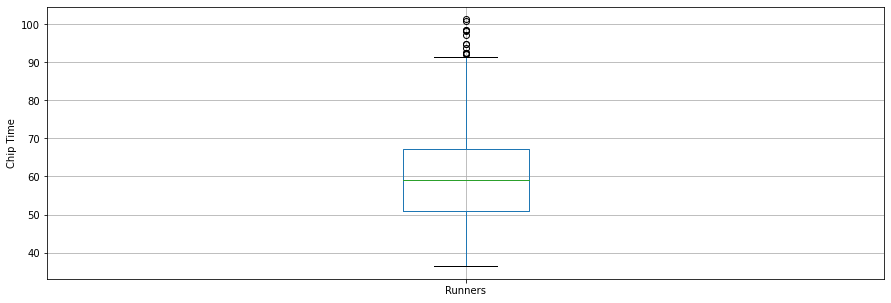

In [69]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 5
 
df7.boxplot(column='Runner_mins')
plt.grid(True, axis='y')
plt.ylabel('Chip Time')
plt.xticks([1], ['Runners'])

C:\Users\74006\miniconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


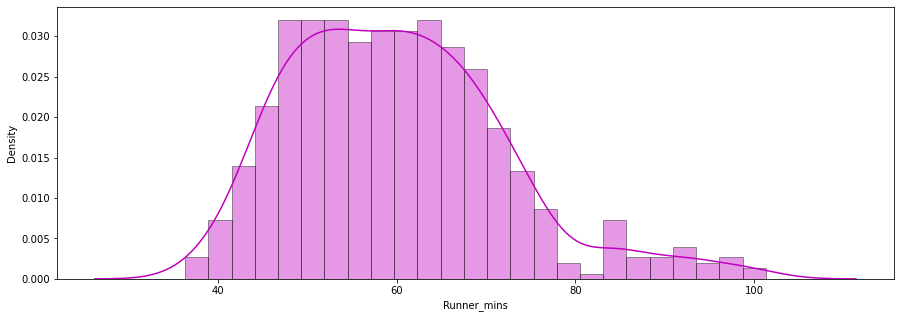

In [74]:
x = df7['Runner_mins']
ax = sns.distplot(x, hist=True, kde=True, rug=False, color='m', bins=25, hist_kws={'edgecolor':'black'})
plt.show()

C:\Users\74006\miniconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\74006\miniconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


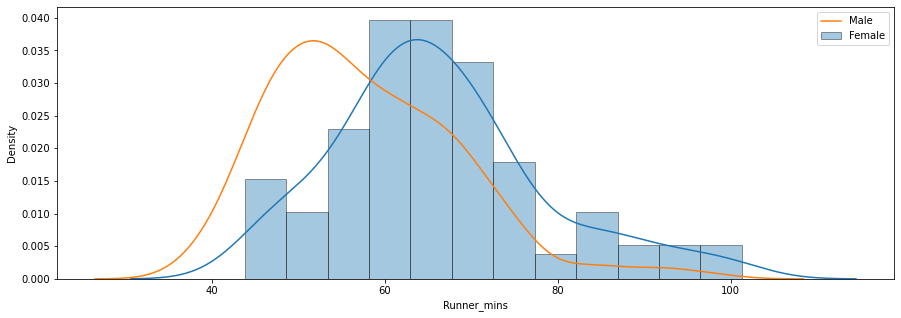

In [75]:
f_fuko = df7.loc[df7[' Gender']==' F']['Runner_mins']
m_fuko = df7.loc[df7[' Gender']==' M']['Runner_mins']

sns.distplot(f_fuko, hist=True, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='Female')
sns.distplot(m_fuko, hist=False, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='Male')
plt.legend()

In [76]:
g_stats = df7.groupby(" Gender", as_index=True).describe()
print(g_stats)

        Runner_mins                                                         \
              count       mean        std        min        25%        50%   
 Gender                                                                      
 F            163.0  66.119223  12.184440  43.766667  58.758333  64.616667   
 M            414.0  57.640821  11.011857  36.350000  49.395833  55.791667   

                                
               75%         max  
 Gender                         
 F       72.058333  101.300000  
 M       64.804167   98.516667  


Text(0.5, 0.98, '')

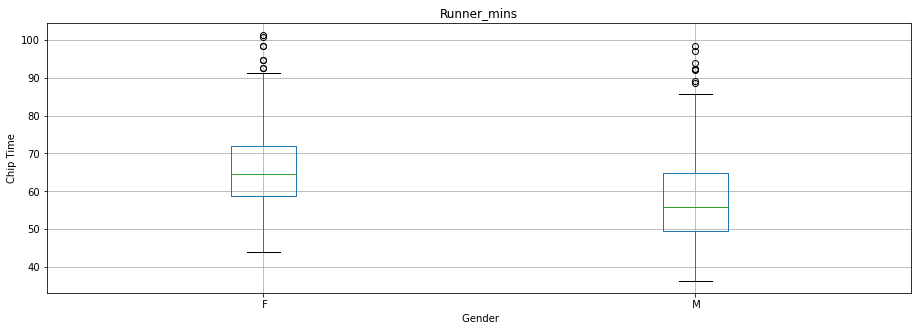

In [77]:
df7.boxplot(column='Runner_mins', by=' Gender')
plt.ylabel('Chip Time')
plt.suptitle("")